<a href="https://colab.research.google.com/github/jiiiisoo/machinelearning/blob/main/supervised%20learning_regression_newmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **새로운 모델 생성**
선형 기저 함수 모델의 사용, k-fold 교차검증 등을 통하여 오차는 많이 줄였지만 이 전의 나이-키 그래프의 문제는 나이>=25 가 되면 키가 급격히 줄어든다는 것이다. 이는 30세 주변의 데이터가 충분하지 않아 일어난 일이므로 '키는 나이가 들면서 점점 커지고 일정한 값에 수렴한다.' 라는 지식을 모델에 추가해야 한다. 

따라서 나이 x가 증가하면서 키가 증가하고 일정한 값으로 수렴하는 함수를 만들면 y(x)=w_0-w_1exp(-w_2x) 로 나타낼 수 있다.

이것도 기존과 동일한 방법으로 평균 제곱 오차인 J가 최소가 되도록 하는 w값들을 찾으면 되는데 이처럼 함수의 최솟값, 최댓값을 구하는 문제를 최적화 문제라고 부르고 다양한 방법으로 해결할 수 있다.

이번에는 파이썬의 scipy.optimize에 포함된 minimize 함수를 사용하여 최적 매개변수를 구해본다. 이 함수는 최솟값을 구하는 함수와 매개 변수의 초기 값만 주면 함수의 미분을 주지 않아도 매개 변수의 극솟값을 출력한다.

w0=169.0, w1=113.7, w2=0.2
SD=3.86 cm


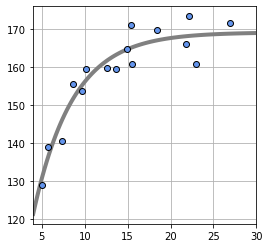

In [8]:
##데이터
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 나이에 따른 키의 인공 데이터 생성
np.random.seed(seed=1)
X_min=4 #X의 하한
X_max=30 #X의 상한
X_n=16 #데이터 개수
X=5+25*np.random.rand(X_n) #16명 나이 설정
Prm_c=[170, 108, 0.2] #생성 매개 변수
T=Prm_c[0]-Prm_c[1]*np.exp(-Prm_c[2]*X)+4*np.random.randn(X_n) #T:출력값
np.savez('ch5_data.npz', X=X, X_min=X_min, X_max=X_max, X_n=X_n, T=T)

##모델A
def model_A(x,w):
  y=w[0]-w[1]*np.exp(-w[2]*x)
  return y

def show_model_A(w):
  xb=np.linspace(X_min,X_max,100)
  y=model_A(xb,w)
  plt.plot(xb,y,c=[.5,.5,.5], lw=4)

def mse_model_A(w,x,t):
  y=model_A(x,w)
  mse=np.mean((y-t)**2)
  return mse

##최적화
from scipy.optimize import minimize
def fit_model_A(w_init,x,t):
  res1=minimize(mse_model_A,w_init, args=(x,t), method='powell') #첫번째 인수: 최소화할 목표 함수, 두번째: w 초기값, 세번째: 함수 최적화하는 매개 변수 w 이외의 변수, 네번째: 사용할 알고리즘
                                                                 # powell 알고리즘: 최소화 함수 사용할 때 늦게 수렴되거나 수렴이 보장되지 않는 경우 실험적으로 사용하는 알고리즘
  return res1.x #??

##main
plt.figure(figsize=(4,4))
W_init=[100,0,0]
W=fit_model_A(W_init,X,T)
print('w0={0:.1f}, w1={1:.1f}, w2={2:.1f}'.format(W[0],W[1],W[2]))
show_model_A(W)
plt.plot(X, T, marker='o', linestyle='None', color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min,X_max)
plt.grid(True)
mse=mse_model_A(W,X,T)
print('SD={:.2f} cm'.format(np.sqrt(mse)))
plt.show()

오차의 SD= 3.68cm 으로 직선, 선형일 때보다 오차도 줄고 그래프는 나이가 커질 수록 증가하다가 일정한 값으로 수렴함을 볼 수 있다.



출처: 파이썬으로 배우는 머신러닝의 교과서-이시카와아키히코